<a href="https://colab.research.google.com/github/Untick/IrisID_gr2/blob/Gaidash-Alexey-folder/Gaidash%20Aleksey/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BF%D0%B0%D1%86%D0%B8%D0%B5%D0%BD%D1%82%D0%B0%20%D0%BF%D0%BE%20%D1%80%D0%B0%D0%B4%D1%83%D0%B6%D0%BD%D0%BE%D0%B9%20%D0%BE%D0%B1%D0%BE%D0%BB%D0%BE%D1%87%D0%BA%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential 
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense 
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam 
# Подключение утилит для to_categorical
from tensorflow.keras import utils 
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image 
# Подключение библиотеки для работы с массивами
import numpy as np 
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt 
# Подключение модуля для работы с файлами
import os

from PIL import Image;
# для распаковки архивов
import zipfile;
import shutil;
# для рзавёртывания изображения на плоскости
import cv2;
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

In [2]:
# Загрузка датасета из облака
import gdown
gdown.download('https://drive.google.com/uc?id=1ZAXRuE6ly8nJG-eGFTkD9Pn663ihCedB', None, quiet=True)

'Iris_ID.zip'

In [3]:
# Распаковываем архив Iris_ID.zip в папку Iris_ID
!unzip -q Iris_ID.zip

In [4]:
# Распакуем вложенные архивы
# Путь к директории с базой
base_dir = '/content/Iris_ID';
dataset_dir = 'dataset';
labels = [];
train_dir = '/content/train'

for path in os.listdir(base_dir):
  with zipfile.ZipFile(base_dir + '/' + path, 'r') as zip_ref:
    name_zip = dataset_dir + '/' + path.split('.')[0];
    zip_ref.extractall(name_zip);
    
    for n in os.listdir(name_zip):
      d_name = train_dir + '/' + n[:-6];
      if os.path.exists(d_name) == False:
        os.makedirs(d_name);

      labels.append(n[:-6]);
      shutil.move(name_zip + '/' + n, d_name);

In [5]:
datasetPath = '/content/train';

x_train = [];
y_train = [];
NUM_CLASSES = 0;
IMG_WIDTH = 100;
IMG_HEIGHT = 100;
Dirs = os.listdir(datasetPath);

# Перебираем каждую директорию
for dir in Dirs:
  # Преобразовываем каждую картинку в массив байт
  for img in os.listdir(datasetPath + '/' + dir):
    i = Image.open(datasetPath + '/' + dir + '/' + img);
    i = i.resize((IMG_WIDTH, IMG_HEIGHT));
    #for t in range(60):
    np_arr = np.array(i); 
    x_train.append(np_arr);
    y_train.append(NUM_CLASSES);

  NUM_CLASSES = NUM_CLASSES + 1;

# Преобразование в numpy-массив загруженных изображений и меток классов, а также
# категоризацция меток

# Нормированние массива изображений
x_train = np.array(x_train);

# отберём 10% на валидационную выборку
index = int(len(x_train) / 10);
x_val = x_train[-index:];

x_val = np.array(x_val);

y_val = y_train[-index:];

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_train = np.array(y_train);

y_val = utils.to_categorical(y_val, NUM_CLASSES);
y_val = np.array(y_val);

# Вывод размерностей
print('Размер массива x_train', x_train.shape);
print('Размер массива y_train', y_train.shape);
print('Размер массива x_val', x_val.shape);
print('Размер массива y_val', y_val.shape);

Размер массива x_train (384, 100, 100, 3)
Размер массива y_train (384, 128)
Размер массива x_val (38, 100, 100, 3)
Размер массива y_val (38, 128)


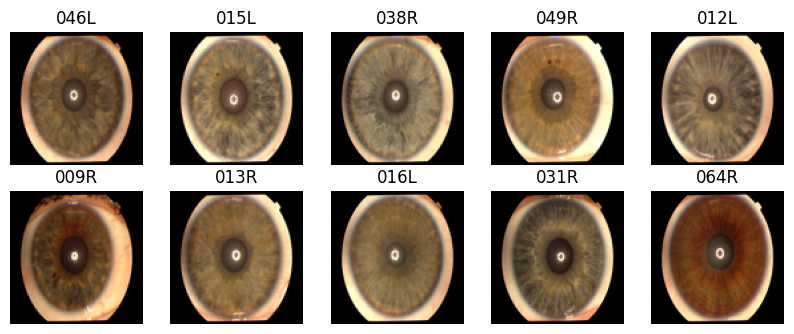


Выведем несколько картоник с метками из валидацианной выборки



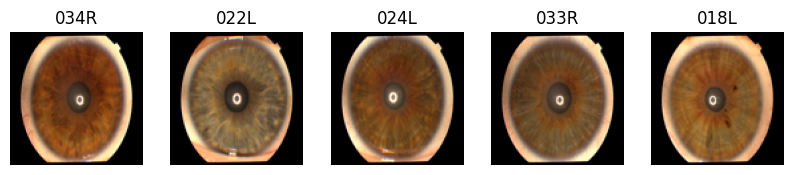

In [6]:
# Примеры картинок с метками
fig = plt.figure(figsize=(10,10))

for i in range(10): 
    n = np.random.randint(0 , x_train.shape[0])
    img = x_train[n];
    ax = fig.add_subplot(5, 5, i+1);
    label = Dirs[np.argmax(y_train[n])];
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show();

print();
print("Выведем несколько картоник с метками из валидацианной выборки");
print();

fig = plt.figure(figsize=(10,10))

for i in range(5):
  n = np.random.randint(0 , x_val.shape[0])
  imageData = x_val[n];
  ax = fig.add_subplot(5, 5, i+1);
  label = Dirs[np.argmax(y_val[n])];
  ax.set_title(label)
  ax.imshow(imageData)
  ax.axis('off')
plt.show();

Создадим свёрточную нейронную сеть

In [7]:
from tensorflow.keras.models import Sequential;

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization;

model = Sequential();
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(100, 100, 3)));
model.add(BatchNormalization());
model.add(Conv2D(256, (3, 3), strides = (3,3), padding='same', activation='relu'));
model.add(MaxPooling2D(pool_size=(3, 3)));
model.add(BatchNormalization());
model.add(Conv2D(128, (3, 3), strides = (3,3), padding='valid', activation='relu'));
model.add(MaxPooling2D(pool_size=(3, 3)));
model.add(Flatten());
model.add(Dense(NUM_CLASSES, activation='softmax'));
print(model.summary());

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 512)     14336     
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 512)    2048      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 256)       1179904   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 256)      0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 256)      1024      
 hNormalization)                                                 
                                                        

In [8]:
# Подключение оптимизатора Adam
from tensorflow.keras.optimizers import Adam

# Компиляция модели
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=50, epochs=30, verbose=1)

Epoch 1/30
8/8 [==============================] - 125s 15s/step - loss: 6.0741 - accuracy: 0.0104 - val_loss: 66.4856 - val_accuracy: 0.0789
Epoch 2/30
8/8 [==============================] - 125s 16s/step - loss: 4.7443 - accuracy: 0.0417 - val_loss: 52.5551 - val_accuracy: 0.0000e+00
Epoch 3/30
8/8 [==============================] - 130s 16s/step - loss: 4.2777 - accuracy: 0.0755 - val_loss: 44.5242 - val_accuracy: 0.0000e+00
Epoch 4/30
8/8 [==============================] - 125s 16s/step - loss: 3.7283 - accuracy: 0.1432 - val_loss: 28.7482 - val_accuracy: 0.1316
Epoch 5/30
8/8 [==============================] - 124s 16s/step - loss: 3.2241 - accuracy: 0.2396 - val_loss: 28.7593 - val_accuracy: 0.1053
Epoch 6/30
8/8 [==============================] - 125s 16s/step - loss: 2.5614 - accuracy: 0.3984 - val_loss: 18.9508 - val_accuracy: 0.1842
Epoch 7/30
8/8 [==============================] - 129s 16s/step - loss: 2.0143 - accuracy: 0.5365 - val_loss: 14.6067 - val_accuracy: 0.1316
Epoch

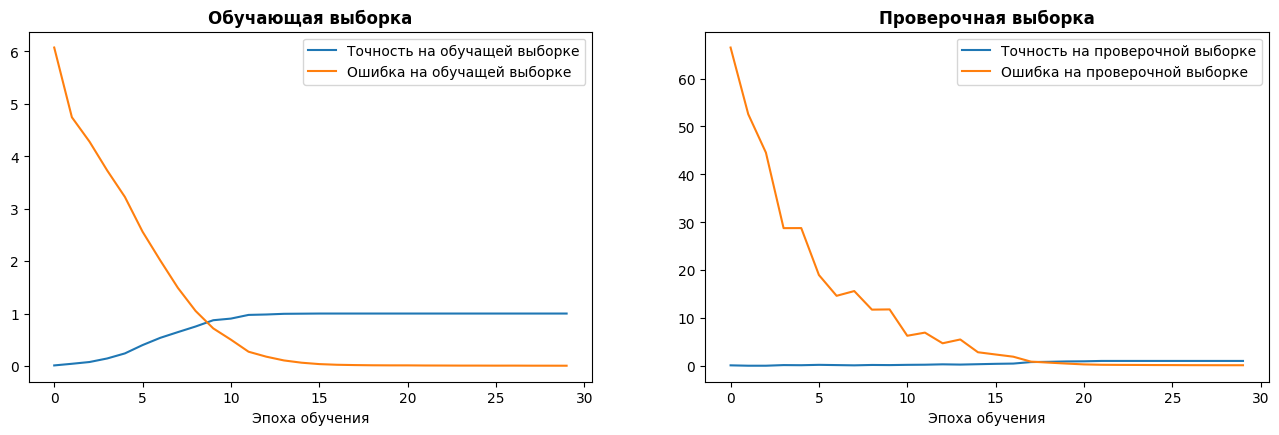

In [10]:
plt.figure(figsize=(16, 10));

plt.subplot(2, 2, 1);
plt.title('Обучающая выборка', fontweight='bold');
plt.plot(history.history['accuracy'], label='Точность на обучащей выборке');
plt.plot(history.history['loss'], label='Ошибка на обучащей выборке');
plt.xlabel('Эпоха обучения');
plt.legend()

plt.subplot(2, 2, 2);
plt.title('Проверочная выборка', fontweight='bold');
plt.plot(history.history['val_accuracy'], label='Точность на проверочной выборке');
plt.plot(history.history['val_loss'], label='Ошибка на проверочной выборке');
plt.xlabel('Эпоха обучения');
plt.legend();

plt.show();

In [13]:
val_acc = history.history['val_accuracy']

for i in range(30):
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность:  7.9%
Эпоха:  1 точность:  0.0%
Эпоха:  2 точность:  0.0%
Эпоха:  3 точность: 13.2%
Эпоха:  4 точность: 10.5%
Эпоха:  5 точность: 18.4%
Эпоха:  6 точность: 13.2%
Эпоха:  7 точность:  7.9%
Эпоха:  8 точность: 15.8%
Эпоха:  9 точность: 13.2%
Эпоха: 10 точность: 18.4%
Эпоха: 11 точность: 21.1%
Эпоха: 12 точность: 28.9%
Эпоха: 13 точность: 23.7%
Эпоха: 14 точность: 31.6%
Эпоха: 15 точность: 39.5%
Эпоха: 16 точность: 44.7%
Эпоха: 17 точность: 76.3%
Эпоха: 18 точность: 81.6%
Эпоха: 19 точность: 89.5%
Эпоха: 20 точность: 92.1%
Эпоха: 21 точность: 100.0%
Эпоха: 22 точность: 100.0%
Эпоха: 23 точность: 100.0%
Эпоха: 24 точность: 100.0%
Эпоха: 25 точность: 100.0%
Эпоха: 26 точность: 100.0%
Эпоха: 27 точность: 100.0%
Эпоха: 28 точность: 100.0%
Эпоха: 29 точность: 100.0%


In [14]:
model2 = Sequential();
model2.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(100, 100, 3)));
model2.add(BatchNormalization());
model2.add(Conv2D(256, (3, 3), strides = (3,3), padding='same', activation='relu'));
model2.add(MaxPooling2D(pool_size=(3, 3)));
model2.add(BatchNormalization());
model2.add(Conv2D(128, (3, 3), strides = (3,3), padding='valid', activation='relu'));
model2.add(MaxPooling2D(pool_size=(3, 3)));
model2.add(Flatten());
model2.add(Dense(NUM_CLASSES, activation='softmax'));
print(model2.summary());

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 512)     14336     
                                                                 
 batch_normalization_2 (Batc  (None, 100, 100, 512)    2048      
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 256)       1179904   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 11, 11, 256)      1024      
 hNormalization)                                                 
                                                      

In [15]:
# Компиляция модели
model2.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [17]:
history2 = model2.fit(x_train, y_train, validation_split=0.2, batch_size=50, epochs=30, verbose=1)

Epoch 1/30
7/7 [==============================] - 110s 16s/step - loss: 5.6219 - accuracy: 0.0163 - val_loss: 72.3077 - val_accuracy: 0.0000e+00
Epoch 2/30
7/7 [==============================] - 109s 15s/step - loss: 4.5415 - accuracy: 0.0521 - val_loss: 68.3205 - val_accuracy: 0.0000e+00
Epoch 3/30
7/7 [==============================] - 116s 17s/step - loss: 3.9563 - accuracy: 0.1010 - val_loss: 69.8514 - val_accuracy: 0.0000e+00
Epoch 4/30
7/7 [==============================] - 104s 15s/step - loss: 3.5290 - accuracy: 0.1759 - val_loss: 65.7695 - val_accuracy: 0.0000e+00
Epoch 5/30
7/7 [==============================] - 110s 16s/step - loss: 2.9869 - accuracy: 0.2834 - val_loss: 53.6906 - val_accuracy: 0.0000e+00
Epoch 6/30
7/7 [==============================] - 105s 15s/step - loss: 2.4414 - accuracy: 0.4169 - val_loss: 55.8417 - val_accuracy: 0.0000e+00
Epoch 7/30
7/7 [==============================] - 107s 15s/step - loss: 1.9861 - accuracy: 0.4853 - val_loss: 46.8726 - val_accura

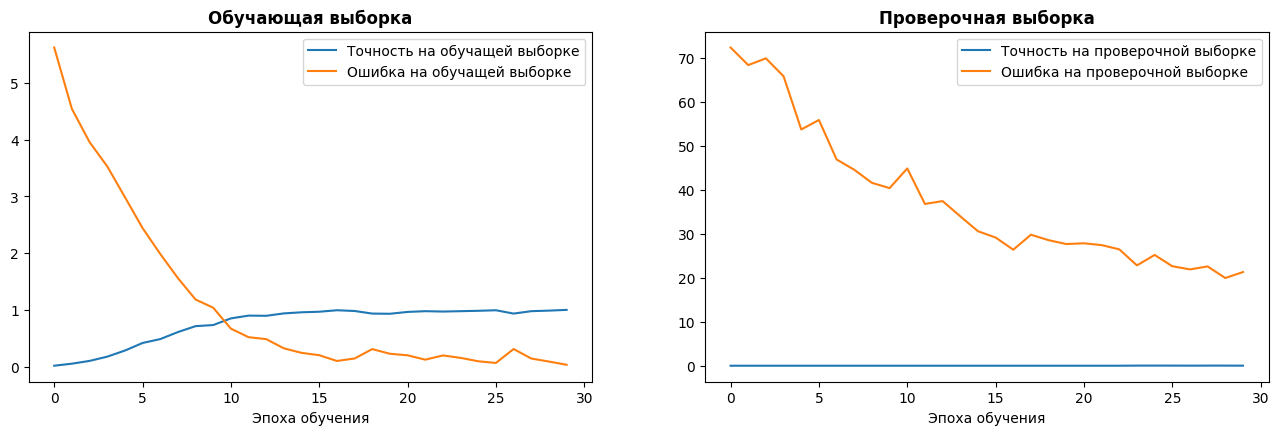

In [18]:
plt.figure(figsize=(16, 10));

plt.subplot(2, 2, 1);
plt.title('Обучающая выборка', fontweight='bold');
plt.plot(history2.history['accuracy'], label='Точность на обучащей выборке');
plt.plot(history2.history['loss'], label='Ошибка на обучащей выборке');
plt.xlabel('Эпоха обучения');
plt.legend()

plt.subplot(2, 2, 2);
plt.title('Проверочная выборка', fontweight='bold');
plt.plot(history2.history['val_accuracy'], label='Точность на проверочной выборке');
plt.plot(history2.history['val_loss'], label='Ошибка на проверочной выборке');
plt.xlabel('Эпоха обучения');
plt.legend();

plt.show();